In [186]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns


columns = ["mpg", "cylinders", "displacement", "horsepower", "weight",
           "acceleration", "model_year", "origin", "car_name"]

df = pd.read_csv('../data/auto-mpg.data',
                 sep=r'\s+',
                 names=columns,
                 na_values='?')

print(f"rows:{df.shape[0]} columns: {df.shape[1]}")


rows:398 columns: 9


In [187]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


In [188]:
print(df.describe())  

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

In [189]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [190]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    print(f"---\nColumn: {col}")
    print("Stats:")
    print(df[col].describe())
    print("Nulls:", df[col].isnull().sum())
    print("Unique values:", df[col].nunique())
    print()

categorical_cols = ['cylinders', 'model_year', 'origin', 'car_name']
for col in categorical_cols:
    print(f"---\nColumn: {col}")
    print("Unique values/count:", df[col].nunique())
    print("Sample values:", df[col].unique()[:10])  
    print("Top 10 most common:")
    print(df[col].value_counts().head(10))
    print()

---
Column: mpg
Stats:
count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64
Nulls: 0
Unique values: 129

---
Column: cylinders
Stats:
count    398.000000
mean       5.454774
std        1.701004
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64
Nulls: 0
Unique values: 5

---
Column: displacement
Stats:
count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64
Nulls: 0
Unique values: 82

---
Column: horsepower
Stats:
count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64
Nulls: 6
Unique values: 93

---
Colu

In [191]:

print("missed values before:")
print(df['horsepower'].isnull().sum())   

median_hp = df['horsepower'].median() 
df.fillna({'horsepower': median_hp}, inplace=True)


print("missed values after:")
print(df['horsepower'].isnull().sum())     


missed values before:
6
missed values after:
0


In [192]:

# One-Hot Encoding برای origin
df = pd.get_dummies(df, columns=['origin'], prefix='origin')
 
  
df = pd.get_dummies(df, columns=['cylinders'], prefix='cyl')
 
df = df.drop('car_name', axis=1)
 

In [193]:

X = df.drop(['mpg'], axis=1)  # تمام ستون‌ها به‌جز mpg
y = df['mpg']
X = df.drop('mpg', axis=1)
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model coefficients:", model.coef_)
print("Intercept:", model.intercept_)




Train shape: (318, 13) Test shape: (80, 13)
Model coefficients: [ 0.01515546 -0.03385105 -0.00589463  0.02016108  0.77239402 -1.5753126
  0.53328052  1.04203208 -4.78068024  2.02950183  2.21614055 -0.80865445
  1.3436923 ]
Intercept: -17.895014902874074


In [194]:

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")


MAE: 2.13
RMSE: 2.69
R2 score: 0.87


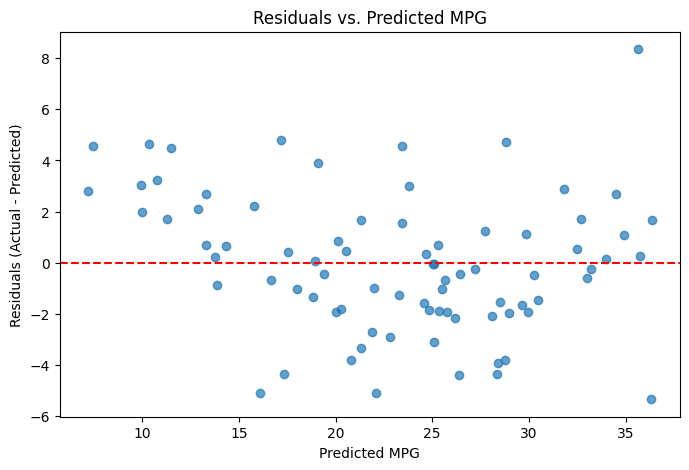

In [195]:

residuals = y_test - y_pred

# رسم نمودار پسماندها
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Predicted MPG')
plt.show()
 


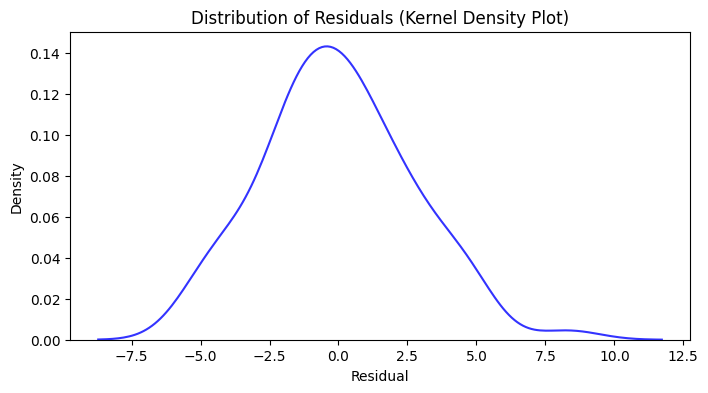

In [197]:

plt.figure(figsize=(8, 4))
sns.kdeplot(residuals,   color='blue', alpha=0.8)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Distribution of Residuals (Kernel Density Plot)')
plt.show()